In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! python -m nltk.downloader punkt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Add your description of the function here.

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [ ]:
# connecting to the dataset server to download the amazon fine foods dataset. Do not make any changes to the code below

con = sqlite3.connect('/content/drive/My Drive/datasets/amazon-fine-food-reviews/database.sqlite')
messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
""", con)

# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
   # insert your code here
   if(x>3):
     return 1
   else:
     return 0   
      
Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']

# call the function to create the train and test splits according to the ratio 75:25
# uncomment and complete the line below

train_X, test_X, train_y, test_y = train_test_split(Summary, Score, test_size=0.25)

# print an example of the dataset after the labeling process
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(2))

In [ ]:
# do not change make any changes to the code below. This part of the
# code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks.
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

corpus = []
count_train_x=0
for text in train_X:
    count_train_x=count_train_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)

### 4. Print before and after using data pre-processing for five data points - [5 pts]
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [ ]:
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. Print randomly 5 
# instances to check the success of the processing step. 
# insert your code here

a=train_X.head(5)
after=[]
print(a)
for text in a:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    after.append(text)
after=pd.DataFrame(after)
print("After preprocessing= ")
print(after)   

263964                                 Dressing is good
462246                                      yummy decaf
364187           lots of sugar and a bit too expensive.
209234    A excellent iced tea that is very refreshing.
220580                    Healthy and happy from Amazon
Name: Summary, dtype: object
After preprocessing= 
                                      0
0                         dress is good
1                           yummi decaf
2     lot of sugar and a bit too expens
3  a excel ice tea that is veri refresh
4         healthi and happi from amazon


### 5. Build a basic decision tree choosing appropriate min_samples_leaf parameter so that tree fits in output cell using Graphviz package [5 pts]
Use the decision tree classifier from the sklearn library to learn a decision tree from the training dataet. For now, we would like to only visualize the tree to ensure that we are calling the correct function. Set the min_samples_leaf parameter to a high value (>15000) for learning the tree. This tree will not be accurate, but will be big enough for us to visualize it. Identify the functions in the tree package that will help to visualize the tree and plot it. Below is a sample tree generated when mi_samples_leaf was set to 20000
![tree.png](attachment:tree.png)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# insert your code here
decision_tree = DecisionTreeClassifier(random_state=0,min_samples_leaf=16000)

In [ ]:
# create object of decision tree classifier (remember to set min_samples_leaf > 15000)
decision_tree=decision_tree.fit(X_train_counts,train_y)
# obj.fit(counts, y)

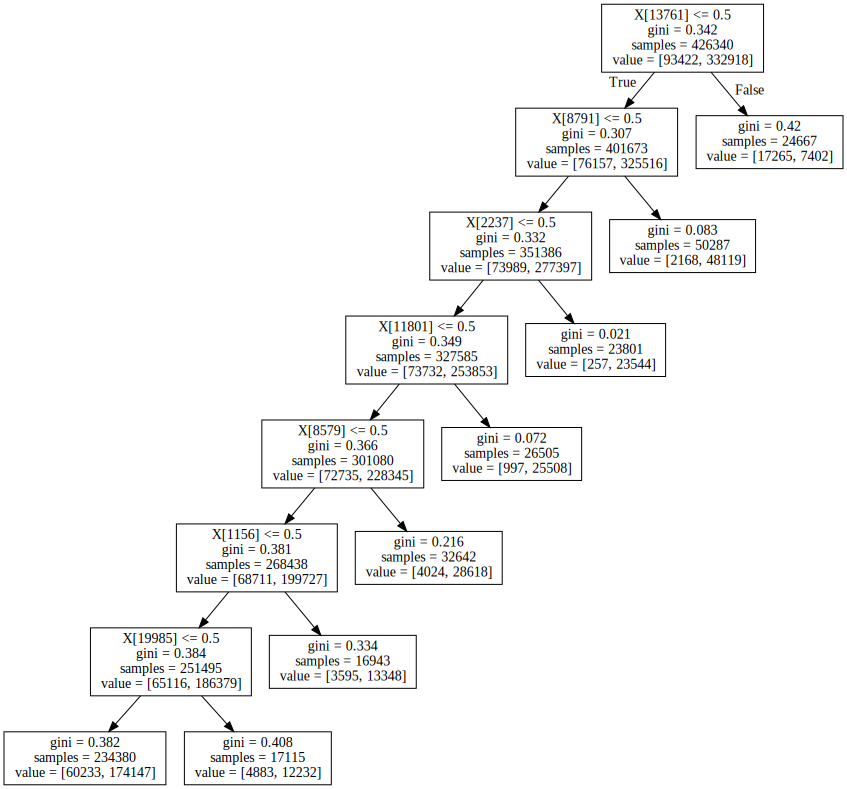

In [ ]:
# Search online graphviz packet to make decision tree... 
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### 6. Experiments with different tree parameters
#### a. minimum number of samples in a node.  [5 pts]
By now we should have all the code in place for learning accurate decision trees. As we discussed in the class, one method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 
The first part of the code should loop around different values for min_samples_split and save the resulting train and test accuracy. In the second part, plot a graph with x-axis being the number of samples in the node and accuracy being the y axis. Plot both the train and test accuracies in the same figure. Write a generic function for the plotting as we will use it later for other visualizations.

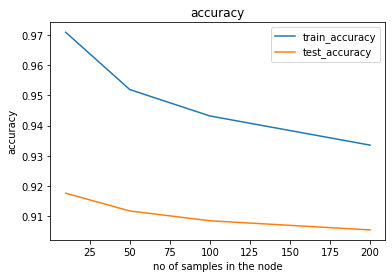

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]
for i in min_samples_split:
    # insert your code here
    decision_tree = DecisionTreeClassifier(random_state=0,min_samples_split=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)


    
def plot_accuracy(test_accuracy_list,train_accuracy_list,nodes, xlabel, ylabel, title):
    # insert your code here
    plt.plot(nodes, train_accuracy_list,label='train_accuracy')
    plt.plot(nodes, test_accuracy_list,label='test_accuracy')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
plot_accuracy(test_accuracy_list,train_accuracy_list,min_samples_split, xlabel="no of samples in the node", ylabel="accuracy", title="accuracy")

#### b. maximum number of leaf nodes in the tree [5 pts]
The tree learner has a parameter max_leaf_nodes. Discuss the role of this parameter during the tree learning. Investigate the impact of this parameter on the train and test accuracy.

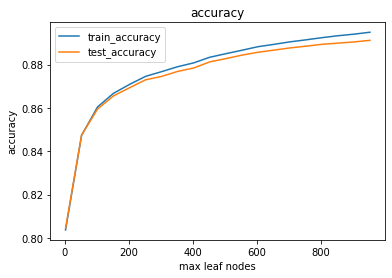

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes=1000
leaves=[]
step_size_2=50
for i in range(2, max_leaf_nodes,step_size_2):
    leaves.append(i)
    decision_tree = DecisionTreeClassifier(random_state=0,max_leaf_nodes=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)

plot_accuracy(test_accuracy_list,train_accuracy_list,leaves, xlabel="max leaf nodes", ylabel="accuracy", title="accuracy")

#### c. splitting criteria [5 pts]
Identify the default splitting critera and experiment with other criterion implemented in the tree package. Report the accuracy on the test dataset as well as other parameters chracterizing the learned decision tree. 

In [ ]:
# insert your code here
reg1=DecisionTreeClassifier(criterion='entropy')
reg2=DecisionTreeClassifier()
otp1=reg1.fit(X_train_counts,train_y)
otp2=reg2.fit(X_train_counts,train_y)
predict1=reg1.predict(X_test_counts)
predict2=reg2.predict(X_test_counts)
accu1=metrics.accuracy_score(predict1,test_y)
accu2=metrics.accuracy_score(predict2,test_y)
print("accuracies:")
print("for criterion gini=",accu1)
print("for criterion entropy=",accu2)

accuracies:
for criterion gini= 0.9147022812671517
for criterion entropy= 0.9130557158337672


#### d. depth of the decision tree [5 pts]
Investigate the impact of depth of the decision tree on the test accuracy

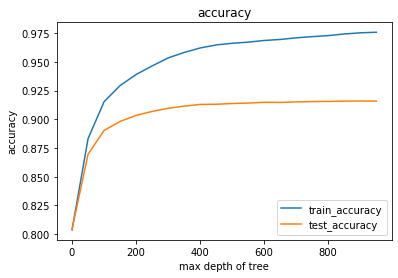

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
maximum_depth=1000
depth=[]
step_size=50
for i in range(1, maximum_depth,step_size):
    #insert your code here
    depth.append(i)
    decision_tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)

plot_accuracy(test_accuracy_list,train_accuracy_list,depth, xlabel="max depth of tree", ylabel="accuracy", title="accuracy")

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Fortunately, sklearn has an ensemble library containing the random forest classifier. Let us learn a random forest using both instance and feature bagging independently.
#### a. briefly describe the input parameters to the random forest classifier [5 pts]
insert your description here
#### b. instance bagging [10 pts]
As discussed in the class, instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

Different parameters available are:

n_estimatorsinteger, optional (default=100):
The number of trees in the forest.

criterionstring, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

max_depthinteger or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_splitint, float, optional (default=2)
The minimum number of samples required to split an internal node.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split.

random_stateint or RandomState, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

max_leaf_nodesint, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

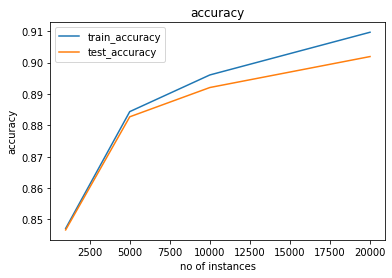

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]
for i in number_of_instances:
    #leaves.append(i)
    decision_tree = RandomForestClassifier(max_samples=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)

plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_instances, xlabel="no of instances", ylabel="accuracy", title="accuracy")

#### c. feature bagging [10 pts]
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

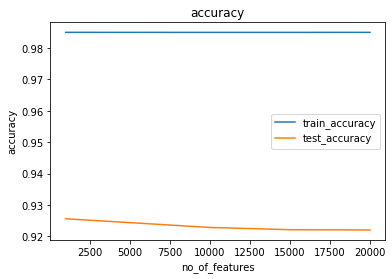

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]
for i in number_of_features:
    # insert your code here
    decision_tree = RandomForestClassifier(max_features=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)

    
plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_features, xlabel="no_of_features", ylabel="accuracy", title="accuracy")

#### d. number of trees in the forest [10 pts]
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

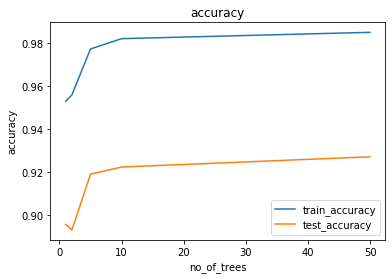

In [ ]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]
for i in number_of_trees:
    # insert your code here
    decision_tree = RandomForestClassifier(n_estimators=i)
    decision_tree=decision_tree.fit(X_train_counts,train_y) 
    prediction=decision_tree.predict(X_test_counts)
    trainprediction=decision_tree.predict(X_train_counts)
    accuracy=metrics.accuracy_score(prediction,test_y)
    test_accuracy_list.append(accuracy)
    trainaccuracy=metrics.accuracy_score(trainprediction,train_y)
    train_accuracy_list.append(trainaccuracy)
    
plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_trees, xlabel="no_of_trees", ylabel="accuracy", title="accuracy")